#Libraries

In [1]:
import time
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from imutils import paths
from tensorflow import keras
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.nn import softmax 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
import cv2

2024-10-29 12:11:21.859977: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-10-29 12:11:24.203564: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-10-29 12:11:24.204564: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-10-29 12:11:24.220421: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-29 12:11:24.220568: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro P2000 computeCapability: 6.1
coreClock: 1.607GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 89.53GiB/s
2024-10-29 12:11:24.220592: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-10-29 12:11:24.223478: I tensorflow/stream_executor/platform/default/dso_loa

In [3]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/3CBA8271BA82280A/My Projects/Temp/Data-Mining/Dataset/FR0"))

data = []
data_cropped = []
labels = []
label = 0
counter_0 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  labels.append(label)
  counter_0 += 1
print(f'Loaded FR0... {counter_0} files has loaded.')

2024-10-29 12:11:24.265269: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-29 12:11:24.266050: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-10-29 12:11:24.266248: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-29 12:11:24.266393: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro P2000 computeCapability: 6.1
coreClock: 1.607GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 89.53GiB/s
2024-10-

Loaded FR0... 6066 files has loaded.


In [4]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/3CBA8271BA82280A/My Projects/Temp/Data-Mining/Dataset/FRI"))


label = 1
counter_1 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  labels.append(label)
  counter_1 += 1
print(f'Loaded FRI... {counter_1} files has loaded.')

Loaded FRI... 5008 files has loaded.


In [5]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/3CBA8271BA82280A/My Projects/Temp/Data-Mining/Dataset/FRII"))

label = 2
counter_2 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  labels.append(label)
  counter_2 += 1
print(f'Loaded FRII... {counter_2} files has loaded.')

Loaded FRII... 2066 files has loaded.


#**Cropping**

In [6]:
data_cropped = []
for image in data:
  image = tf.image.crop_to_bounding_box(image, 120, 120, 60, 60)
  data_cropped.append(image)


#**EDA**

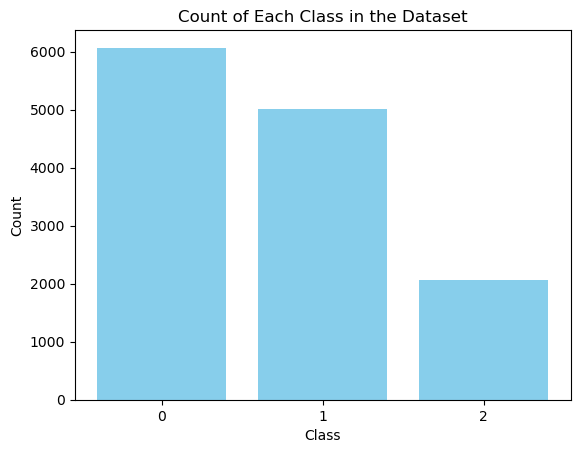

In [7]:
counter = Counter(labels)
sorted_counts = dict(sorted(counter.items()))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class in the Dataset')
plt.xticks(range(3))
plt.show()

In [8]:
labels = np.array(labels,dtype='uint8')
data = np.array(data,dtype='uint8')
data_cropped = np.array(data_cropped,dtype='uint8')

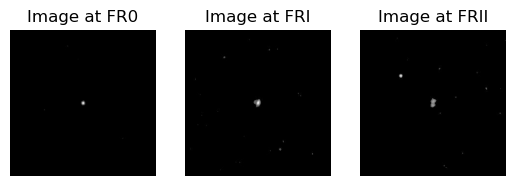

In [9]:
class_0 = data[labels == 0]
image = np.squeeze(class_0[1])
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FR0")

class_1 = data[labels == 1]
image = np.squeeze(class_1[1])
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRI")

class_2 = data[labels == 2]
image = np.squeeze(class_2[1])
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

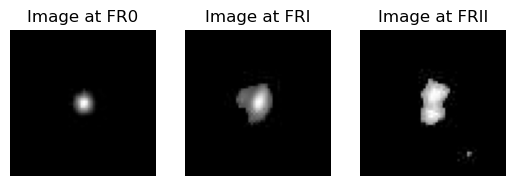

In [10]:
class_0 = data_cropped[labels == 0]
image = np.squeeze(class_0[1])
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FR0")

class_1 = data_cropped[labels == 1]
image = np.squeeze(class_1[1])
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRI")

class_2 = data_cropped[labels == 2]
image = np.squeeze(class_2[1])
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

#**Filterring**

In [11]:
data_cropped.shape, labels.shape

((13140, 60, 60, 1), (13140,))

In [12]:
mask = np.array([np.max(image) >= 5 for image in data_cropped])
filtered_data = data_cropped[mask]
filtered_labels = labels[mask]

In [13]:
mask_useless = np.array([np.max(image) < 5 for image in data_cropped])
useless_data = data_cropped[mask_useless]
useless_labels = labels[mask_useless]

In [14]:
class_0_useless = useless_data[useless_labels == 0]
class_1_useless = useless_data[useless_labels == 1]
class_2_useless = useless_data[useless_labels == 2]

In [15]:
np.max(class_0_useless), np.max(class_1_useless), np.max(class_2_useless)

(2, 0, 2)

In [16]:
class_0_useless.shape, class_1_useless.shape, class_2_useless.shape

((94, 60, 60, 1), (40, 60, 60, 1), (36, 60, 60, 1))

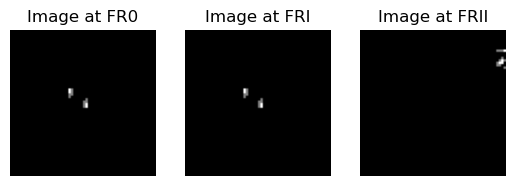

In [17]:
temp = 0
for i in class_0_useless:
  if np.max(i) >temp:
    temp = np.max(i)
    image = np.squeeze(i)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FR0")

temp = 0
for i in class_1_useless:
  if np.max(i) >temp:
    temp = np.max(i)
    image = np.squeeze(i)
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRI")

temp = 0
for i in class_2_useless:
  if np.max(i) >temp:
    temp = np.max(i)
    image = np.squeeze(i)
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

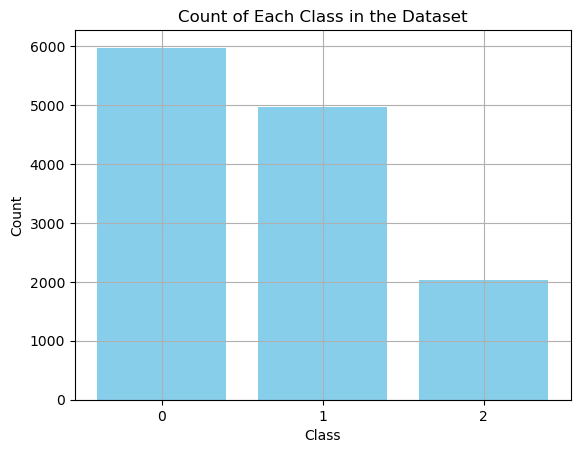

In [18]:
counter = Counter(filtered_labels)
sorted_counts = dict(sorted(counter.items()))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.grid(True)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class in the Dataset')
plt.xticks(range(3))
plt.show()

In [19]:
class_0_image = filtered_data[filtered_labels == 0]
class_1_image = filtered_data[filtered_labels == 1]
class_2_image = filtered_data[filtered_labels == 2]
class_0_image.shape, class_1_image.shape, class_2_image.shape

((5972, 60, 60, 1), (4968, 60, 60, 1), (2030, 60, 60, 1))

#**Augmentation**

In [20]:
datagen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             shear_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')
class_2_data = filtered_data[filtered_labels == 2]
class_1_data = filtered_data[filtered_labels == 1]


augmented_class_2_data = []
augmented_class_2_labels = []

for i in range(4000):
    image = class_2_data[np.random.randint(0, len(class_2_data))]
    augmented_image = datagen.random_transform(image)
    augmented_class_2_data.append(augmented_image)
    augmented_class_2_labels.append(2)



augmented_class_1_data = []
augmented_class_1_labels = []

for i in range(1000):
    image = class_1_data[np.random.randint(0, len(class_1_data))]
    augmented_image = datagen.random_transform(image)
    augmented_class_1_data.append(augmented_image)
    augmented_class_1_labels.append(1)



In [21]:
augmented_class_2_data = np.array(augmented_class_2_data)
augmented_class_2_labels = np.array(augmented_class_2_labels)

augmented_class_1_data = np.array(augmented_class_1_data)
augmented_class_1_labels = np.array(augmented_class_1_labels)

final_data = np.concatenate((filtered_data, augmented_class_2_data, augmented_class_1_data), axis=0)
final_labels = np.concatenate((filtered_labels, augmented_class_2_labels, augmented_class_1_labels), axis=0)

In [22]:
print("Final data shape:", augmented_class_1_data.shape)
print("Final labels shape:", augmented_class_2_data.shape)
print("Final data shape:", final_data.shape)
print("Final labels shape:", final_labels.shape)

Final data shape: (1000, 60, 60, 1)
Final labels shape: (4000, 60, 60, 1)
Final data shape: (17970, 60, 60, 1)
Final labels shape: (17970,)


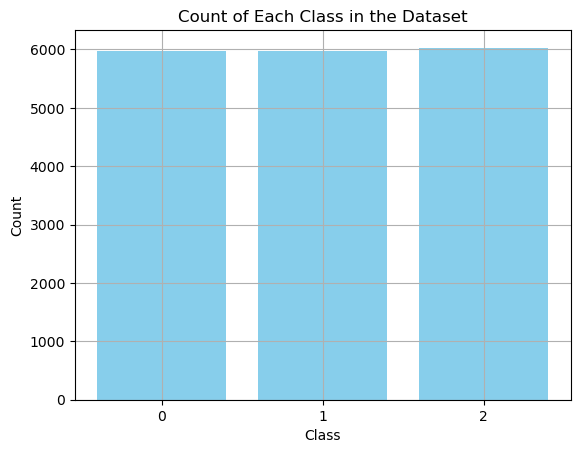

In [23]:
counter = Counter(final_labels)
sorted_counts = dict(sorted(counter.items()))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.grid(True)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class in the Dataset')
plt.xticks(range(3))
plt.show()

In [24]:
class_0_flatten = []
class_1_flatten = []
class_2_flatten = []


for image in final_data[final_labels == 0]:
    class_0_flatten.append(image.flatten())

for image in final_data[final_labels == 1]:
    class_1_flatten.append(image.flatten())

for image in final_data[final_labels == 2]:
    class_2_flatten.append(image.flatten())


class_0_flatten = np.array(class_0_flatten, dtype='uint8')
class_1_flatten = np.array(class_1_flatten, dtype='uint8')
class_2_flatten = np.array(class_2_flatten, dtype='uint8')

class_0_flatten.shape, class_1_flatten.shape, class_2_flatten.shape, final_data.shape, final_labels.shape

((5972, 3600), (5968, 3600), (6030, 3600), (17970, 60, 60, 1), (17970,))

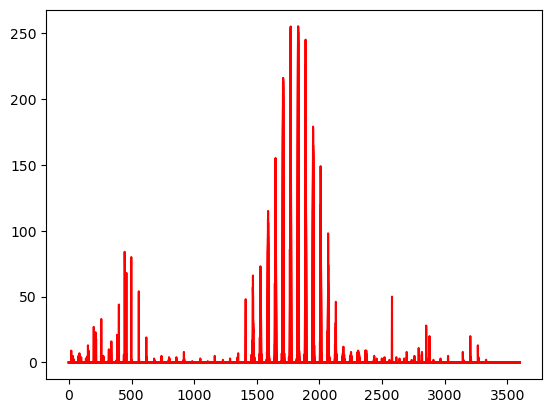

In [25]:
for i in range(10):
    plt.plot(class_0_flatten[i], color='red')

plt.show();

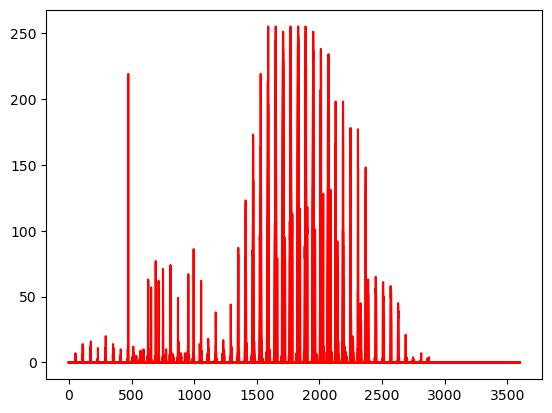

In [26]:
for i in range(10):
    plt.plot(class_1_flatten[i], color='red')

plt.show();

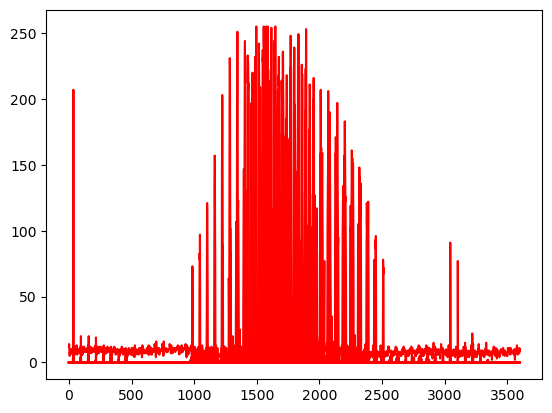

In [27]:
for i in range(10):
    plt.plot(class_2_flatten[i], color='red')
    
plt.show();

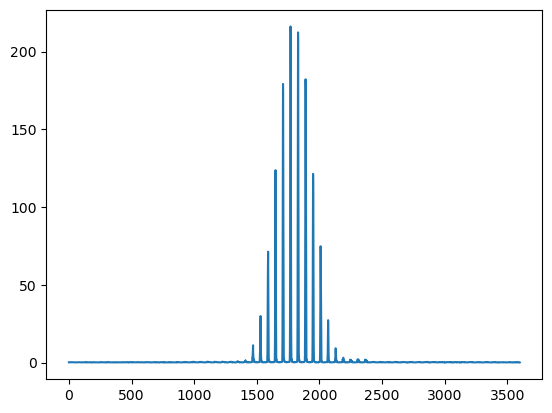

In [28]:
class_0_mean = np.mean(class_0_flatten, axis=0)

plt.plot(class_0_mean)
plt.show()

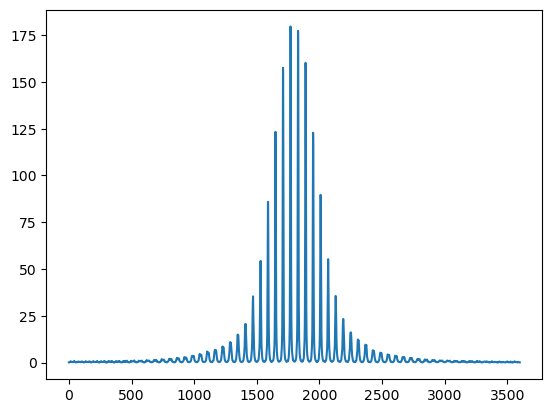

In [29]:
class_1_mean = np.mean(class_1_flatten, axis=0)

plt.plot(class_1_mean)
plt.show()

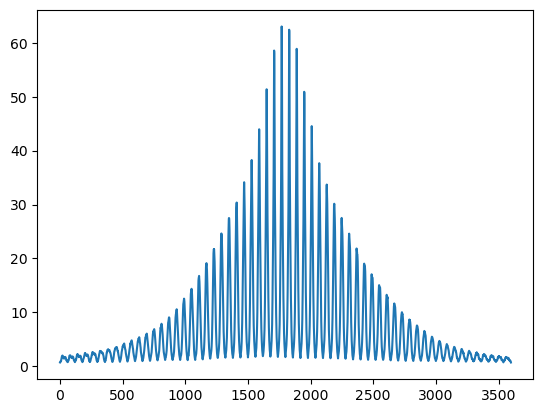

In [30]:
class_2_mean = np.mean(class_2_flatten, axis=0)

plt.plot(class_2_mean)
plt.show()

#**EDA**

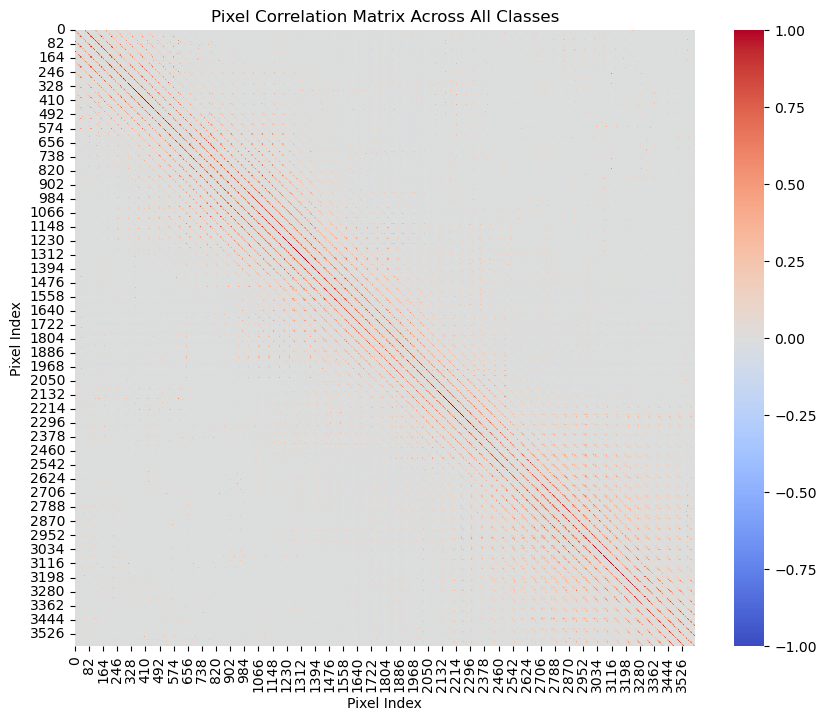

In [31]:
correlation_matrix = np.corrcoef(class_0_flatten, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pixel Correlation Matrix Across All Classes")
plt.xlabel("Pixel Index")
plt.ylabel("Pixel Index")
plt.show()

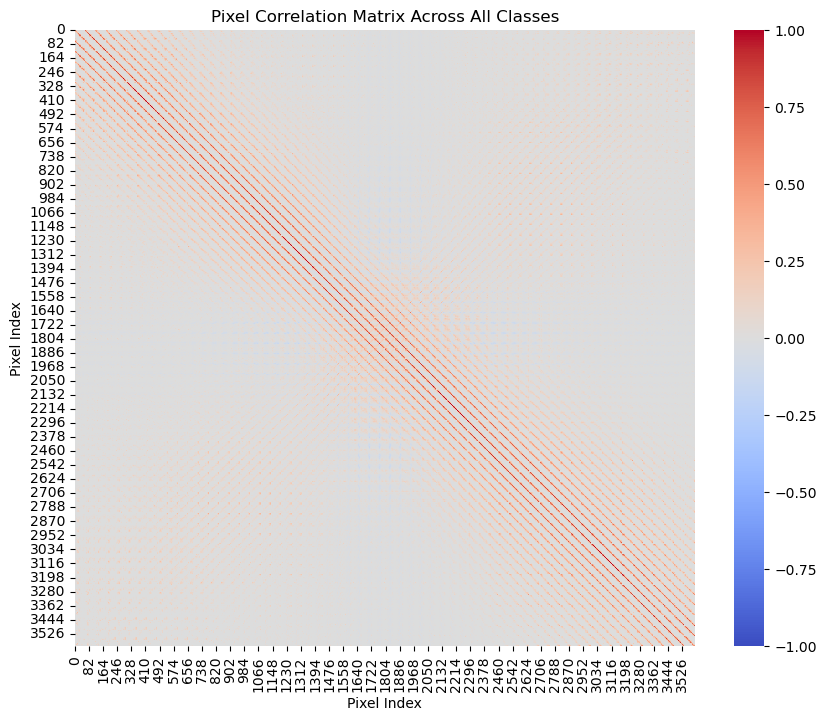

In [32]:
correlation_matrix = np.corrcoef(class_1_flatten, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pixel Correlation Matrix Across All Classes")
plt.xlabel("Pixel Index")
plt.ylabel("Pixel Index")
plt.show()

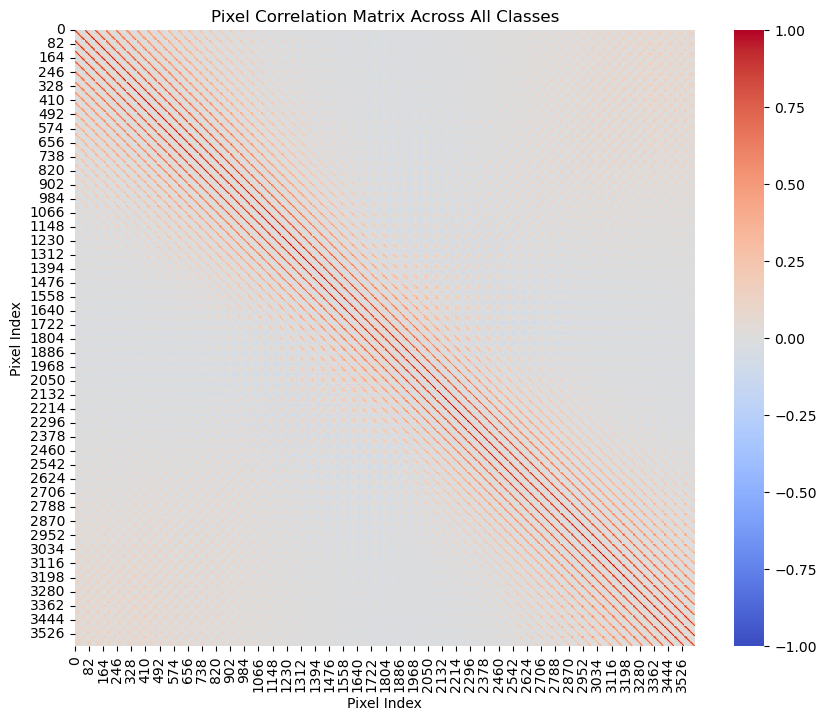

In [33]:
correlation_matrix = np.corrcoef(class_2_flatten, rowvar=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pixel Correlation Matrix Across All Classes")
plt.xlabel("Pixel Index")
plt.ylabel("Pixel Index")
plt.show()

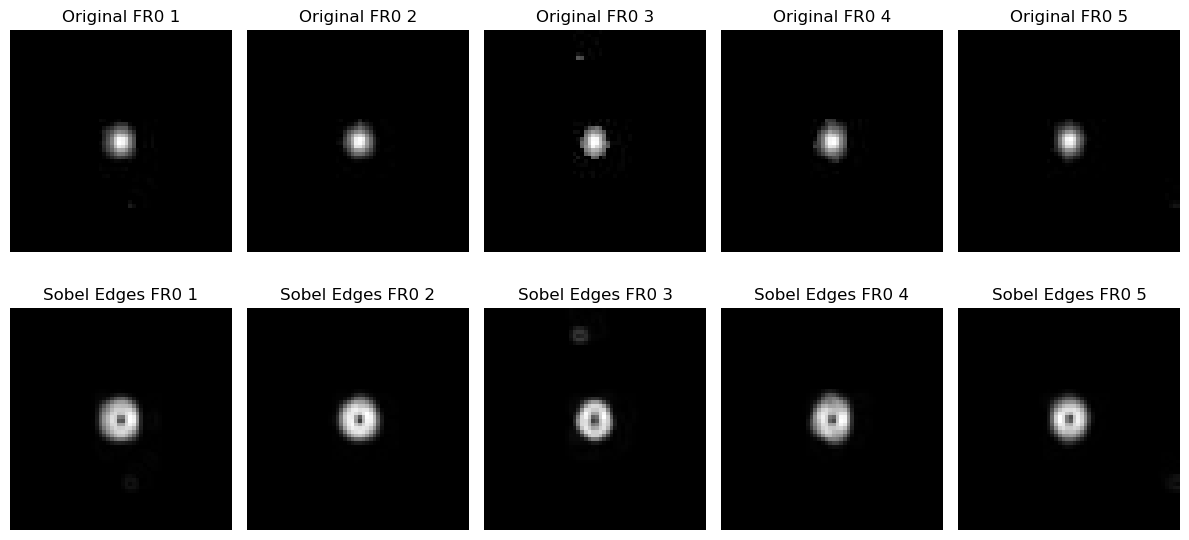

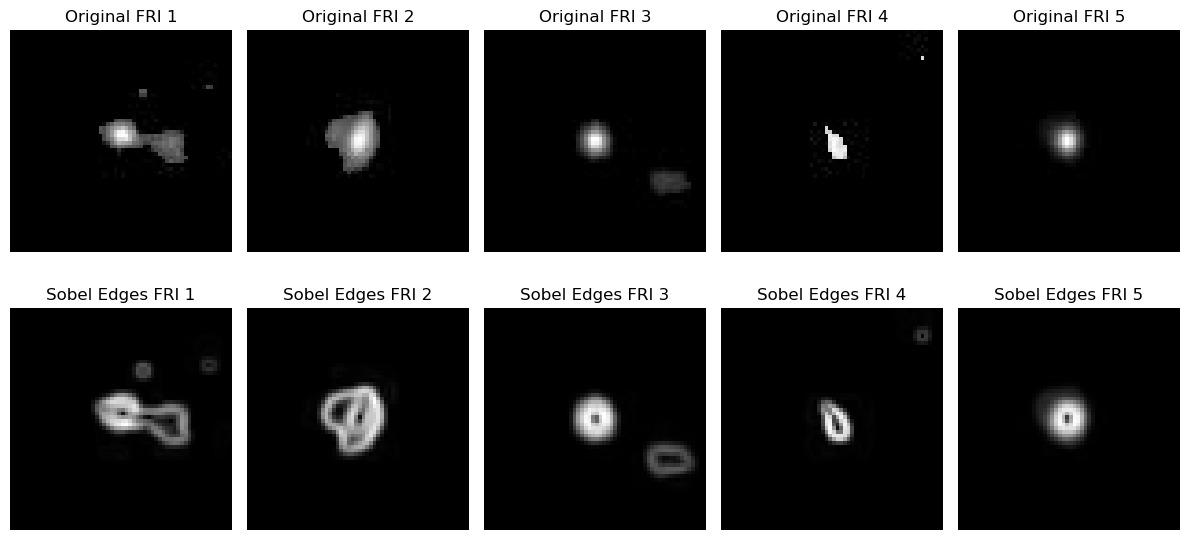

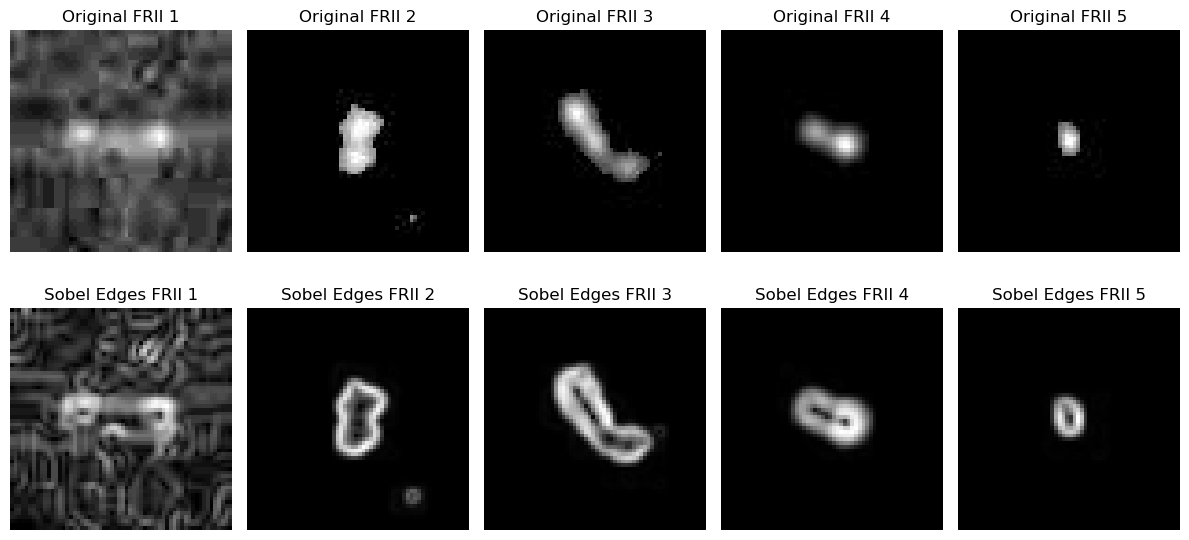

In [34]:
def apply_edge_detection(image, method="sobel"):
    if method == "sobel":
        # Apply Sobel filter in both x and y directions
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
        edge_image = np.sqrt(sobel_x**2 + sobel_y**2)  # Combine x and y edges
    elif method == "canny":
        # Apply Canny edge detection
        edge_image = cv2.Canny(image, 100, 200)
    return edge_image

# Visualize edge detection on samples from each class
def visualize_edge_detection(class_data, class_name, method="sobel"):
    plt.figure(figsize=(12, 6))
    for i in range(5):  # Display 5 images per class
        image = class_data[i]
        edge_image = apply_edge_detection(image, method)
        plt.subplot(2, 5, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Original {class_name} {i+1}")
        plt.axis('off')

        plt.subplot(2, 5, i+6)
        plt.imshow(edge_image, cmap='gray')
        plt.title(f"{method.capitalize()} Edges {class_name} {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Apply to each class with Sobel
visualize_edge_detection(class_0, "FR0", method="sobel")
visualize_edge_detection(class_1, "FRI", method="sobel")
visualize_edge_detection(class_2, "FRII", method="sobel")

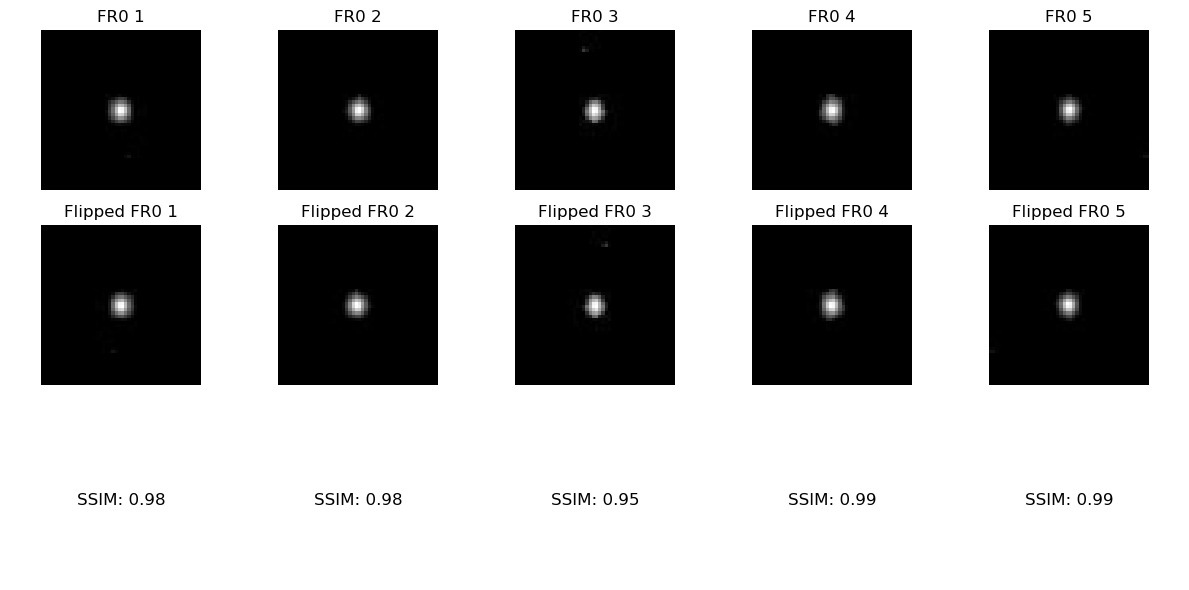

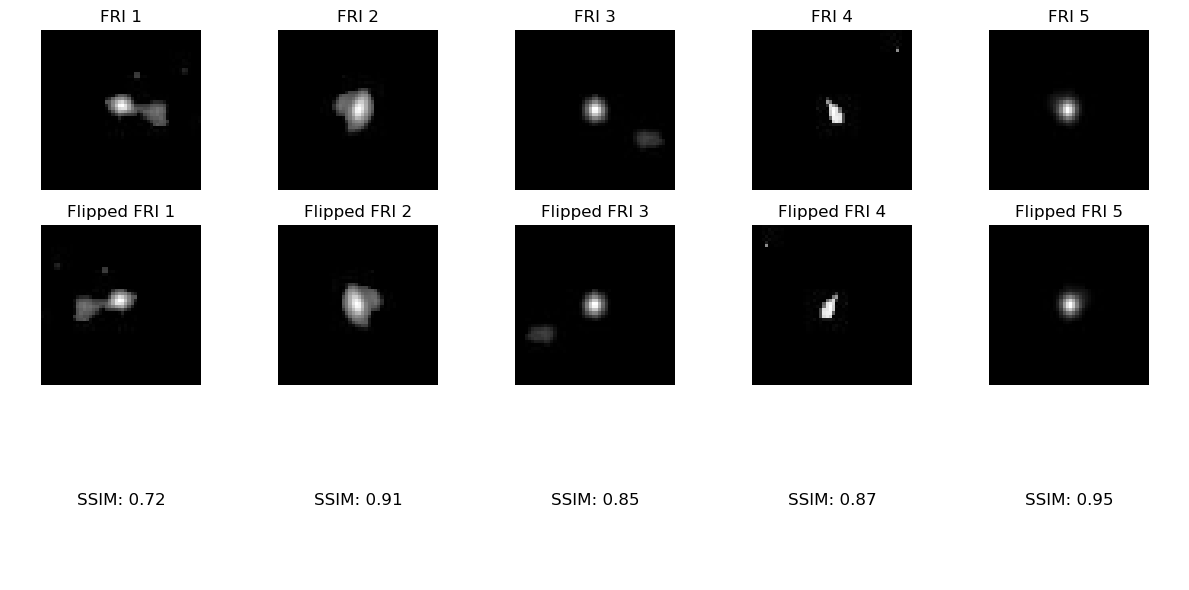

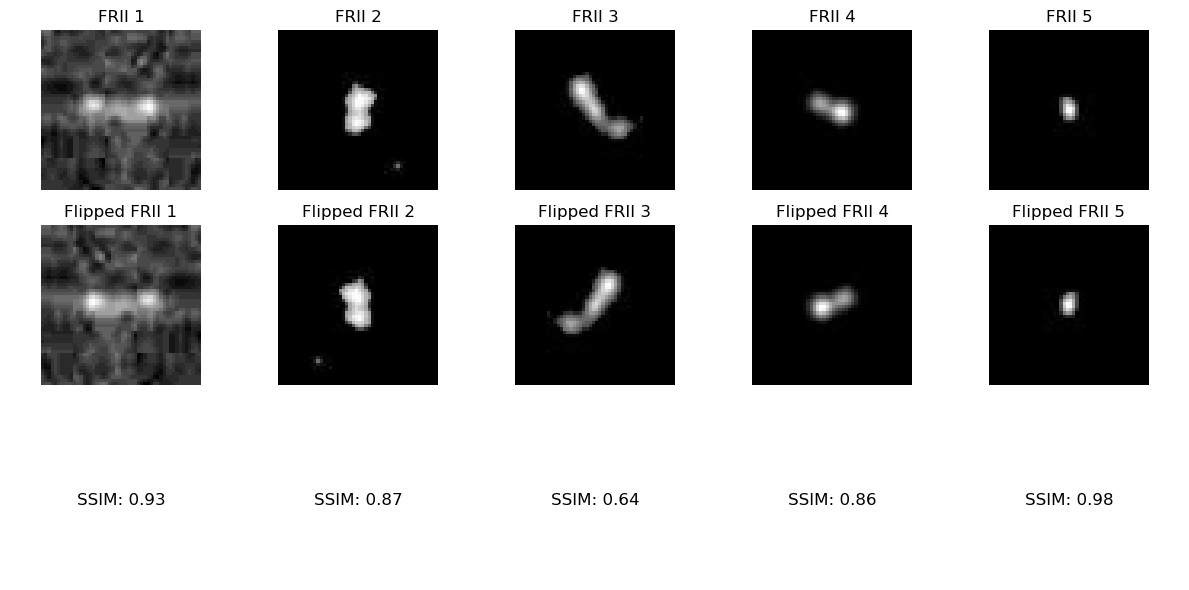

In [35]:
from skimage.metrics import structural_similarity as ssim

# Function to compute symmetry score using SSIM
def compute_symmetry_score(image):
    # Resize the image to ensure consistent dimensions (in case there’s any discrepancy)
    image = cv2.resize(image, (50, 50))  # Ensure 50x50 dimensions, based on your dataset
    flipped_image = cv2.flip(image, 1)

    # Calculate SSIM between original and flipped images
    score, _ = ssim(image, flipped_image, full=True)
    return score

# Visualize symmetry analysis for a sample of images from each class
def visualize_symmetry_analysis(class_data, class_name):
    plt.figure(figsize=(12, 6))
    for i in range(5):  # Display 5 images per class
        image = class_data[i]
        image = cv2.resize(image, (50, 50))  # Ensure 50x50 dimensions
        symmetry_score = compute_symmetry_score(image)

        # Original Image
        plt.subplot(3, 5, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(f"{class_name} {i+1}")
        plt.axis('off')

        # Flipped Image
        flipped_image = cv2.flip(image, 1)
        plt.subplot(3, 5, i+6)
        plt.imshow(flipped_image, cmap='gray')
        plt.title(f"Flipped {class_name} {i+1}")
        plt.axis('off')

        # Symmetry Score
        plt.subplot(3, 5, i+11)
        plt.text(0.5, 0.5, f"SSIM: {symmetry_score:.2f}", ha='center', va='center', fontsize=12)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Apply to each class
visualize_symmetry_analysis(class_0, "FR0")
visualize_symmetry_analysis(class_1, "FRI")
visualize_symmetry_analysis(class_2, "FRII")



#**Preprocessing**

In [36]:
np.min(final_data[0]), np.max(final_data[0])

(0, 248)

In [37]:
data_normalized = final_data / 255

In [38]:
print(f'Min of original = {np.min(final_data[0])}')
print(f'Max of original = {np.max(final_data[0])}')
print(f'Min of original = {np.min(data_normalized[0])}')
print(f'Max of original = {np.max(data_normalized[0])}')

Min of original = 0
Max of original = 248
Min of original = 0.0
Max of original = 0.9725490196078431


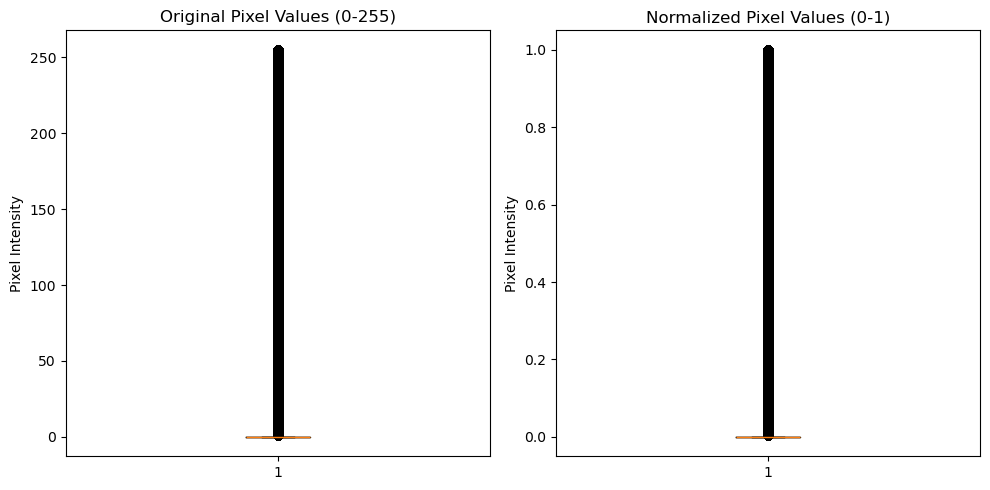

In [39]:
cropped_flat = final_data.flatten()
normalized_flat = data_normalized.flatten()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(cropped_flat)
plt.title("Original Pixel Values (0-255)")
plt.ylabel("Pixel Intensity")

plt.subplot(1, 2, 2)
plt.boxplot(normalized_flat)
plt.title("Normalized Pixel Values (0-1)")
plt.ylabel("Pixel Intensity")

plt.tight_layout()
plt.show()

#**Splitting**

In [40]:
x = data_normalized
y = final_labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((12579, 60, 60, 1), (12579,), (5391, 60, 60, 1), (5391,))

#**CNN**

In [41]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [56]:
model_cnn = keras.Sequential()

#CNN
model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=(60, 60, 1)))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Activation('relu'))
model_cnn.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3)))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Activation('relu'))
model_cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3)))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Activation('relu'))
model_cnn.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model_cnn.add(keras.layers.Conv2D(64, kernel_size=(3,3)))
model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.Activation('relu'))


#Dense
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(units=128, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.5))
model_cnn.add(keras.layers.Dense(units=128, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.4))
model_cnn.add(keras.layers.Dense(units=128, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.4))
model_cnn.add(keras.layers.Dense(units=128, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.4))
model_cnn.add(keras.layers.Dense(units=128, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.4))


#Output
model_cnn.add(keras.layers.Dense(units=3, activation=keras.activations.softmax))


#Model Compiling
optimizer = keras.optimizers.Adam(learning_rate=0.000002)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = [keras.metrics.CategoricalAccuracy()]

model_cnn.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


#Builing and Summury
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 58, 58, 64)        640       
_________________________________________________________________
batch_normalization_4 (Batch (None, 58, 58, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 58, 58, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 64)        36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 27, 27, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 27, 27, 64)       

In [57]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

In [58]:
start = time.perf_counter()
hist = model_cnn.fit(x_train, y_train, batch_size=512, epochs=500, validation_data=(x_test, y_test), callbacks=[early_stopping])
end = time.perf_counter()

Epoch 1/500
25/25 [==============================] - 7s 271ms/step - loss: 1.2893 - accuracy: 0.3293 - val_loss: 1.1000 - val_accuracy: 0.3261
Epoch 2/500
25/25 [==============================] - 6s 260ms/step - loss: 1.2794 - accuracy: 0.3349 - val_loss: 1.1008 - val_accuracy: 0.3261
Epoch 3/500
25/25 [==============================] - 6s 259ms/step - loss: 1.2672 - accuracy: 0.3313 - val_loss: 1.1013 - val_accuracy: 0.3261
Epoch 4/500
25/25 [==============================] - 6s 259ms/step - loss: 1.2432 - accuracy: 0.3384 - val_loss: 1.1017 - val_accuracy: 0.3261
Epoch 5/500
25/25 [==============================] - 6s 259ms/step - loss: 1.2562 - accuracy: 0.3361 - val_loss: 1.1020 - val_accuracy: 0.3261
Epoch 6/500
25/25 [==============================] - 6s 260ms/step - loss: 1.2338 - accuracy: 0.3329 - val_loss: 1.1021 - val_accuracy: 0.3261
Epoch 7/500
25/25 [==============================] - 6s 259ms/step - loss: 1.2205 - accuracy: 0.3511 - val_loss: 1.1020 - val_accuracy: 0.3261

In [59]:
(end - start)/ 60

53.75911107861666

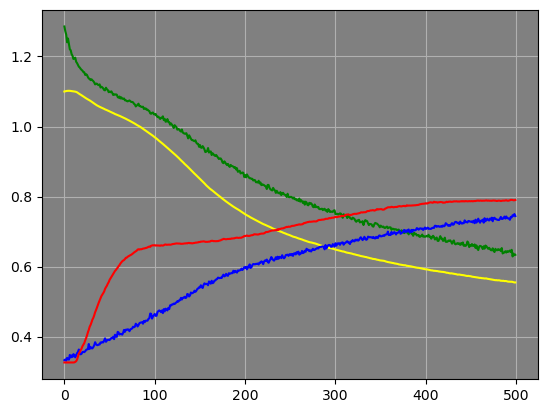

In [60]:
acc_train = hist.history['accuracy']
acc_test = hist.history['val_accuracy']
loss_train = hist.history['loss']
loss_test = hist.history['val_loss']

plt.axes().set_facecolor('gray')
plt.grid('True')


plt.plot(loss_train, color='green', label='Train loss')
plt.plot(loss_test, color='yellow', label='Test loss')
plt.plot(acc_train, color='blue', label='Train acc')
plt.plot(acc_test, color='red', label='Test acc')


plt.show()

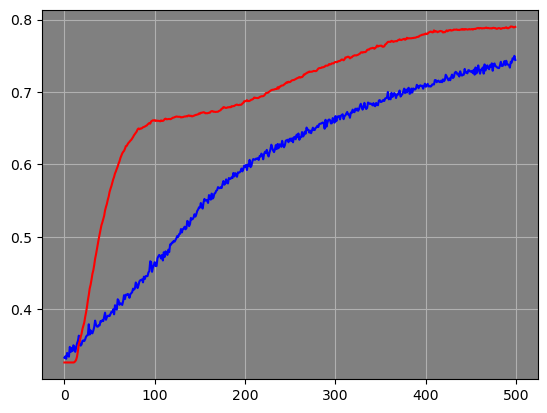

In [61]:
acc_train = hist.history['accuracy']
acc_test = hist.history['val_accuracy']

plt.axes().set_facecolor('gray')
plt.grid('True')


plt.plot(acc_train, color='blue', label='Train acc');
plt.plot(acc_test, color='red', label='Test acc');


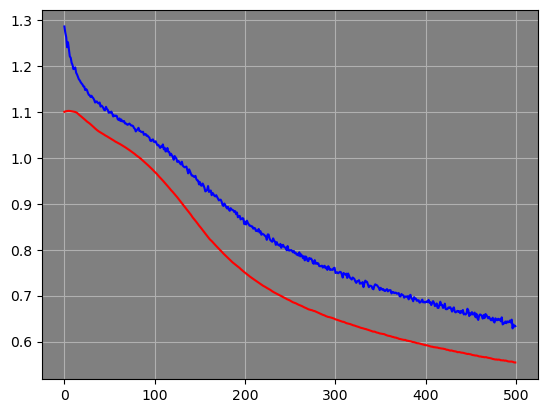

In [62]:
loss_train = hist.history['loss']
loss_test = hist.history['val_loss']

plt.axes().set_facecolor('gray')
plt.grid('True')


plt.plot(loss_train, color='blue', label='Train loss');
plt.plot(loss_test, color='red', label='Test loss');



In [63]:
model_cnn.evaluate(x=x_test, y=y_test)
model_cnn.evaluate(x=x_train, y=y_train)

394/394 [==============================] - 2s 5ms/step - loss: 0.5210 - accuracy: 0.8097


[0.5210205316543579, 0.8096827864646912]

In [64]:
y_pred_train = model_cnn.predict(x_train)
y_pred_test = model_cnn.predict(x_test)


index_train = random.randint(0, 12579)
print(f'y_train: {y_train[index_train]} y_pred_train:{y_pred_train[index_train]}')

index_test = random.randint(0, 5391)
print(f'y_test: {y_test[index_test]} y_pred_test:{y_pred_test[index_test]}')


y_train: 1 y_pred_train:[0.29640505 0.53129053 0.1723044 ]
y_test: 0 y_pred_test:[0.727802   0.21405222 0.05814573]


In [65]:
y_pred_train_smax = softmax(y_pred_train, axis=1)
y_pred_test_smax = softmax(y_pred_test, axis=1)

y_pred_train_smax = np.argmax(y_pred_train_smax, axis=1)
y_pred_test_smax = np.argmax(y_pred_test_smax, axis=1)


y_pred_test_smax.shape, y_pred_train_smax.shape

((5391,), (12579,))

In [66]:
acc_train = accuracy_score(y_train, y_pred_train_smax)
acc_test = accuracy_score(y_test, y_pred_test_smax)

p = precision_score(y_test, y_pred_test_smax, average='micro')
r = recall_score(y_test, y_pred_test_smax, average='micro')


print(f'Acc Train: {acc_train} - Acc Test: {acc_test} - Percision: {p} - Recall: {r}')

Acc Train: 0.8096828046744574 - Acc Test: 0.7900204043776665 - Percision: 0.7900204043776665 - Recall: 0.7900204043776665


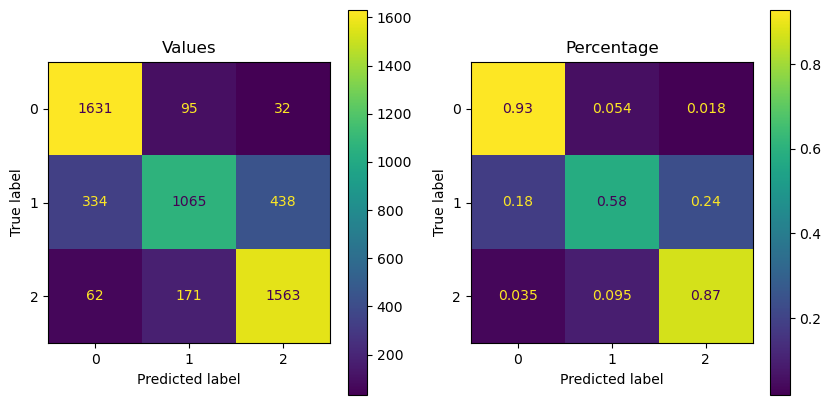

In [67]:
cm_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test_smax)
disp_cm_test = ConfusionMatrixDisplay(cm_test)

cm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
disp_cm_test_perce = ConfusionMatrixDisplay(cm_test)


fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Values')
ax2.set_title('Percentage')
disp_cm_test.plot(ax=ax1);
disp_cm_test_perce.plot(ax=ax2);

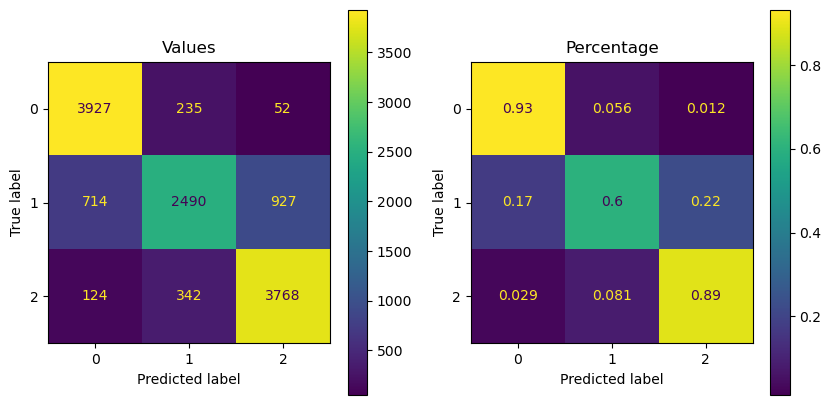

In [68]:
cm_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train_smax)
disp_cm_train = ConfusionMatrixDisplay(cm_train)

cm_train = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
disp_cm_train_perce = ConfusionMatrixDisplay(cm_train)


fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Values')
ax2.set_title('Percentage')
disp_cm_train.plot(ax=ax1);
disp_cm_train_perce.plot(ax=ax2);

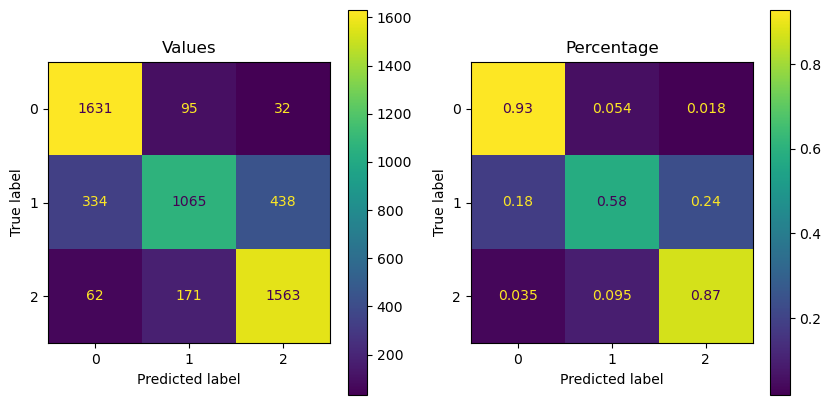

In [69]:
cm_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test_smax)
disp_cm_test = ConfusionMatrixDisplay(cm_test)

cm_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
disp_cm_test_perce = ConfusionMatrixDisplay(cm_test)


fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Values')
ax2.set_title('Percentage')
disp_cm_test.plot(ax=ax1);
disp_cm_test_perce.plot(ax=ax2);